### <font color="DodgerBlue">hw5pr2 digits modeler</font>

Suggestion:
+ set up this file and the example iris_modeler, or your births_modeler, file side-by-side...
+ for each modeler cell, copy it over..
   + edit it and make adjustments to suit the births problem (as needed)
   + run it to make sure it all works as it should!

And, by the end, you'll have re-experienced the full ML/data modeling workflow (for classification, at least)
+ Running through this workflow by hand is a great way to digest the process...
+ AI is welcome, too...  In that case, you'll then need to reconcile what's what (as always).
+ hw5ec is for another - optional - example, using your own dataset or, possibly, regression 
+ Don't forget the final experiment -- measuring the prediction-accuracy across partial digits from absurd (1 pixel) to full (64 pixels)
  + Here are the details, also copied below:

<br>
<hr>
<br>

+ <font color="DodgerBlue"><b>Partial-digit Finale:</b></font> &nbsp; The _final challenge_ is to run the whole learning-process from 1 pixel to 64 pixels:
  + (these instructions are also repeated below)
  + it's best to create a **single cell** over which you can loop
  + no need to build the "final model" -- just use the cross-validation results for your measurement of prediction-accuracy
  + be sure to plot the prediction accuracy (on the y axis) against the number of pixels (on the x axis) 
  + extra karma - <font color="Goldenrod">not required</font> - for plotting the value of `k` (on the y axis) against the number of pixels (on the x axis)
+ Extra karma or no, do be sure to <font color="Coral">share your short reflection</font>, a few sentences on your ML/AI workflows overall... and the results of your digit-prediction across all those partial images...

In [65]:
#
# hw5pr2digits_modeler:  handwritten-digit modeling with k-nearest neighbors...
#

#### For visualizing digits!

pixels as 1d numpy array (row):
 [ 0  0  0 10 11  0  0  0  0  0  9 16  6  0  0  0  0  0 15 13  0  0  0  0
  0  0 14 10  0  0  0  0  0  1 15 12  8  2  0  0  0  0 12 16 16 16 10  1
  0  0  7 16 12 12 16  4  0  0  0  9 15 12  5  0]

pixels as 2d numpy array (image):
 [[ 0  0  0 10 11  0  0  0]
 [ 0  0  9 16  6  0  0  0]
 [ 0  0 15 13  0  0  0  0]
 [ 0  0 14 10  0  0  0  0]
 [ 0  1 15 12  8  2  0  0]
 [ 0  0 12 16 16 16 10  1]
 [ 0  0  7 16 12 12 16  4]
 [ 0  0  0  9 15 12  5  0]]


<Axes: >

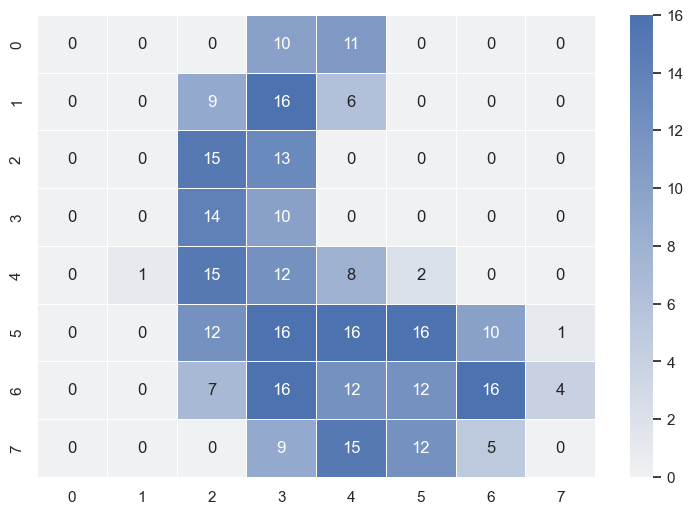

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()

# Load the example flights dataset and convert to CS35_Participant_2-form
digits_orig = pd.read_csv('./digits.csv')
list_of_column_names = digits_orig.columns

ROW = 0
COLUMN = 1
digits2 = digits_orig.drop( list_of_column_names[-1], axis=COLUMN)  # drop the rightmost column - it's just a url!
digitsA = digits2.values  # get a numpy array (digitsA) from the dataframe (digits2)

row_to_show = 42   # choose the digit (row) you want to show... (watch out for indexing!)

pixels_as_row = digitsA[row_to_show,0:64]
print("pixels as 1d numpy array (row):\n", pixels_as_row)

pixels_as_image = np.reshape(pixels_as_row, (8,8))   # reshape into a 2d 8x8 array (image)
print("\npixels as 2d numpy array (image):\n", pixels_as_image)

# create the figure, f, and the axes, ax:
f, ax = plt.subplots(figsize=(9, 6))

# colormap choice! Fun!   www.practicalpythonfordatascience.com/ap_seaborn_palette or seaborn.pydata.org/tutorial/color_palettes.html
our_colormap = sns.color_palette("light:b", as_cmap=True) 

# Draw a heatmap with the numeric values in each cell (make annot=False to remove the values)
sns.heatmap(pixels_as_image, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=our_colormap)

In [67]:
#
# hw5pr1iris_modeler:  iris clasification via nearest neighbors
#

# We will be using the sklearn library - let's check if we have it:
import sklearn

In [68]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [69]:
# let's read in our flower data...
# 
cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
#df_tidy1 = df_tidy.drop('actual_digit',axis=COLUMN)
#df_tidy1

digits_cleaned.csv : file read into a pandas dataframe.


In [70]:
#
# it's no fun fiddling with the default table formatting.
#
# Remember: we have the data itself!  If we want to see it, we can print:

(NROWS, NCOLS) = df_tidy.shape
print(f"There are {NROWS = } and {NCOLS = }")
print()

for row in range(0,NROWS,5):
    print(df_tidy[row:row+5])    # Let's print 5 at a time...

There are NROWS = 1768 and NCOLS = 65

   pix0  pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  ...  pix55  \
0     0     0     9    14     8     1     0     0     0     0  ...      0   
1     0     0    11    12     0     0     0     0     0     2  ...      0   
2     0     0     1     9    15    11     0     0     0     0  ...      0   
3     0     0     0     0    14    13     1     0     0     0  ...      0   
4     0     0     5    12     1     0     0     0     0     0  ...      2   

   pix56  pix57  pix58  pix59  pix60  pix61  pix62  pix63  actual_digit  
0      0      0     11     16     15     11      1      0             8  
1      0      0      9     12     13      3      0      0             9  
2      0      0      1     10     13      3      0      0             0  
3      0      0      0      1     13     16      1      0             1  
4      0      0      3     11      8     13     12      4             2  

[5 rows x 65 columns]
   pix0  pix1  pix2  pix3  pix4

In [71]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

DIGITS = ['0','1','2','3','4','5','6','7','8','9']   # int to str
DIGITS_INDEX = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}  # str to int

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [72]:
A = df_tidy.to_numpy()    # yields the underlying numpy array
print(A)


[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [73]:

#
# let's make sure it's all floating-point, so we can multiply and divide
#
#       this is not needed here, but it can be important if some features are integer and floating point is needed


A = A.astype('float64')  # so many numpy types!   Here is a list:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)


[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [74]:
#
# Also, nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [75]:
# let's use all of our variables, to reinforce that we have everything:
# (1) names...
# (2) access and control...
# choose a row index, n:

n = 42     # the row number

# This shows us that we have complete access to any individual data "point" (row)
print(f"pixels #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {round(value,2)}")


pixels #42 is [ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.  6.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 0.0
  Its pix3 is 10.0
  Its pix4 is 11.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 9.0
  Its pix11 is 16.0
  Its pix12 is 6.0
  Its pix13 is 0.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 15.0
  Its pix19 is 13.0
  Its pix20 is 0.0
  Its pix21 is 0.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 14.0
  Its pix27 is 10.0
  Its pix28 is 0.0
  Its pix29 is 0.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 1.0
  Its pix34 is 15.0
  Its pix35 is 12.0
  Its pix36 is 8.0
  Its pix37 is 2.0


In [76]:
df_tidy.shape

(1768, 65)

In [77]:
df_tidy.columns

Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

In [78]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

#
# Watch out!  Between datasets, this cell is one that often needs to be carefully changed...
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (actual_digits)   are all here: \n {y_all}")
print()
print(f"X_all (just the features, 5 rows worth) are \n {X_all[0:5]}")


+++ Start of data definitions +++

y_all (actual_digits)   are all here: 
 [8. 9. 0. ... 8. 9. 8.]

X_all (just the features, 5 rows worth) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  

In [79]:
#
# we scramble the data, to remove (potential) dependence on the data ordering:
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_labeled}")
print()
print(f"The corresponding data rows are \n {X_labeled}")


The scrambled labels/species are 
 [4. 5. 0. ... 4. 6. 7.]

The corresponding data rows are 
 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  8. ...  0.  0.  0.]
 [ 0.  0. 10. ...  3.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 16.  8.  0.]
 [ 0.  2. 15. ...  0.  0.  0.]]


In [80]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data at all when building the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    To do so, let's define TEST_PERCENT as 0.2
#

TEST_PERCENT = 0.2

from sklearn.model_selection import train_test_split      # this function splits into training + testing sets

# Here we create four numpy arrays:
#    X_train are a 2d array of features and observations for training
#    y_train are a single-column of the correct species for X_train (that's how it trains!)
#
#    X_test are a 2d array of features and observations for testing (unseen during training)
#    y_test are a single-column of the correct species for X_test (so we can measure how well the testing goes...) 

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=TEST_PERCENT)  # random_state=42

# Done!  Let's confirm these match our intution:

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)} rows)")
print(f"y_test: {y_test}")
print(f"X_test (first few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)} rows)")
print(f"y_train: {y_train}")
print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354 rows)
y_test: [4. 6. 8. 7. 8. 2. 1. 8. 1. 7. 7. 8. 4. 9. 2. 4. 1. 6. 5. 9. 3. 2. 7. 0.
 0. 1. 6. 5. 9. 5. 3. 3. 9. 7. 5. 4. 9. 6. 5. 5. 6. 1. 9. 6. 1. 0. 1. 9.
 4. 2. 0. 3. 5. 8. 4. 5. 8. 9. 3. 2. 1. 5. 0. 2. 2. 5. 8. 8. 5. 6. 9. 1.
 6. 5. 6. 7. 5. 2. 5. 5. 4. 5. 8. 9. 4. 2. 4. 3. 3. 9. 4. 7. 4. 3. 6. 6.
 6. 7. 4. 9. 2. 0. 0. 3. 1. 2. 6. 0. 8. 7. 6. 2. 8. 4. 5. 8. 9. 6. 1. 6.
 9. 2. 5. 9. 4. 7. 0. 2. 4. 8. 4. 2. 5. 6. 8. 1. 4. 1. 2. 7. 4. 7. 5. 8.
 5. 5. 9. 2. 9. 8. 7. 3. 9. 0. 1. 4. 1. 1. 3. 9. 9. 6. 9. 4. 7. 5. 4. 9.
 2. 2. 2. 6. 2. 2. 8. 6. 7. 9. 1. 4. 8. 4. 7. 2. 3. 1. 0. 6. 1. 3. 9. 1.
 7. 8. 7. 2. 7. 9. 3. 9. 3. 5. 7. 4. 3. 2. 3. 9. 3. 3. 2. 8. 4. 9. 3. 6.
 7. 8. 8. 7. 0. 6. 8. 3. 4. 3. 1. 1. 6. 2. 6. 9. 7. 2. 3. 6. 3. 4. 9. 6.
 5. 3. 6. 4. 6. 3. 0. 5. 7. 1. 3. 2. 6. 5. 4. 8. 5. 9. 1. 0. 9. 8. 4. 4.
 6. 6. 6. 2. 7. 4. 3. 3. 3. 8. 0. 0. 9. 5. 8. 9. 0. 7. 5. 2. 1. 4. 7. 2.
 5. 2. 0. 1. 6. 8. 0. 6. 

In [81]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)

knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model ... it's one line!
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  

Created and trained a knn classifier with k = 84


In [82]:
#
# +++ This cell is our "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [4. 6. 8. 7. 8. 2. 1. 8. 1. 7. 7. 8. 4. 9. 2. 4. 1. 6. 5. 9. 3. 2. 7. 0.
 0. 1. 6. 5. 9. 5. 3. 3. 9. 7. 5. 4. 9. 6. 5. 5. 6. 2. 9. 6. 1. 0. 1. 9.
 4. 2. 0. 3. 5. 1. 4. 5. 8. 7. 3. 2. 1. 5. 0. 2. 2. 5. 8. 8. 5. 6. 9. 1.
 6. 5. 6. 7. 5. 2. 5. 5. 4. 5. 8. 9. 4. 3. 4. 3. 3. 9. 4. 7. 4. 3. 6. 6.
 6. 7. 4. 9. 2. 0. 0. 3. 1. 2. 6. 0. 8. 7. 6. 2. 8. 4. 5. 8. 9. 6. 1. 0.
 9. 7. 5. 9. 4. 7. 0. 2. 7. 8. 4. 2. 5. 6. 8. 3. 4. 1. 2. 7. 4. 7. 5. 8.
 5. 5. 9. 2. 4. 8. 7. 3. 3. 0. 1. 4. 1. 1. 3. 9. 0. 6. 9. 4. 7. 5. 4. 9.
 2. 2. 3. 6. 2. 2. 8. 6. 7. 9. 6. 4. 8. 4. 7. 2. 3. 6. 0. 6. 1. 3. 9. 1.
 7. 8. 7. 2. 7. 9. 3. 9. 3. 5. 7. 4. 3. 2. 3. 9. 3. 3. 2. 1. 4. 9. 3. 6.
 7. 8. 8. 7. 0. 6. 7. 3. 4. 3. 1. 1. 6. 2. 6. 9. 7. 2. 3. 6. 3. 4. 9. 6.
 5. 3. 6. 4. 6. 3. 0. 5. 7. 1. 3. 2. 6. 5. 4. 8. 5. 9. 1. 0. 1. 8. 4. 4.
 6. 6. 6. 2. 7. 4. 3. 3. 3. 8. 0. 0. 9. 5. 8. 9. 0. 7. 5. 2. 1. 4. 7. 2.
 5. 2. 0. 1. 6. 1. 0. 6. 7. 9. 1. 8. 4. 2. 1. 5. 1. 7. 3. 2. 9. 2. 2. 7.
 7. 6. 0. 7. 1. 9. 5. 4. 0. 1. 2.

In [83]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')   
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {DIGITS[p]:>12s} {DIGITS[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :            4 4              
row   1 :            6 6              
row   2 :            8 8              
row   3 :            7 7              
row   4 :            8 8              
row   5 :            2 2              
row   6 :            1 1              
row   7 :            8 8              
row   8 :            1 1              
row   9 :            7 7              
row  10 :            7 7              
row  11 :            8 8              
row  12 :            4 4              
row  13 :            9 9              
row  14 :            2 2              
row  15 :            4 4              
row  16 :            1 1              
row  17 :            6 6              
row  18 :            5 5              
row  19 :            9 9              
row  20 :            3 3              
row  21 :            2 2              
row  22 :            7 7              
row  23 :            0 0              
row  24 :         

333

In [84]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_digits_list = knn_model.predict(our_features)   # PREDICT!

    predicted_digits= int(round(predicted_digits_list[0]))  # unpack the one element it contains
    name = DIGITS[predicted_digits]                          # look up the species
    return name        
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#


LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


for Features in LoD:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0], I predict 4
From the Features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0], I predict 8
From the Features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0], I predict 4
From the Features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0], I predict 8
From the Features [0, 0, 0, 3, 16, 3, 0, 0

In [87]:
#
# Here, we use "cross validation" to find the "best" k...
#

import time
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function 
    print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")

    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k

    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!

    
# use best_k!
print(f"best_k = {best_k}   yields the highest average cv accuracy: {best_accuracy}")  # print the best one


k:  1  cv accuracy:  0.9873
k:  2  cv accuracy:  0.9830
k:  3  cv accuracy:  0.9844
k:  4  cv accuracy:  0.9802
k:  5  cv accuracy:  0.9830
k:  6  cv accuracy:  0.9816
k:  7  cv accuracy:  0.9809
k:  8  cv accuracy:  0.9788
k:  9  cv accuracy:  0.9781
k: 10  cv accuracy:  0.9767
k: 11  cv accuracy:  0.9738
k: 12  cv accuracy:  0.9752
k: 13  cv accuracy:  0.9724
k: 14  cv accuracy:  0.9717
k: 15  cv accuracy:  0.9696
k: 16  cv accuracy:  0.9703
k: 17  cv accuracy:  0.9689
k: 18  cv accuracy:  0.9703
k: 19  cv accuracy:  0.9668
k: 20  cv accuracy:  0.9661
k: 21  cv accuracy:  0.9653
k: 22  cv accuracy:  0.9639
k: 23  cv accuracy:  0.9632
k: 24  cv accuracy:  0.9632
k: 25  cv accuracy:  0.9604
k: 26  cv accuracy:  0.9590
k: 27  cv accuracy:  0.9569
k: 28  cv accuracy:  0.9569
k: 29  cv accuracy:  0.9554
k: 30  cv accuracy:  0.9547
k: 31  cv accuracy:  0.9547
k: 32  cv accuracy:  0.9533
k: 33  cv accuracy:  0.9512
k: 34  cv accuracy:  0.9505
k: 35  cv accuracy:  0.9477
k: 36  cv accuracy: 

<Axes: xlabel='k_value', ylabel='accuracy'>

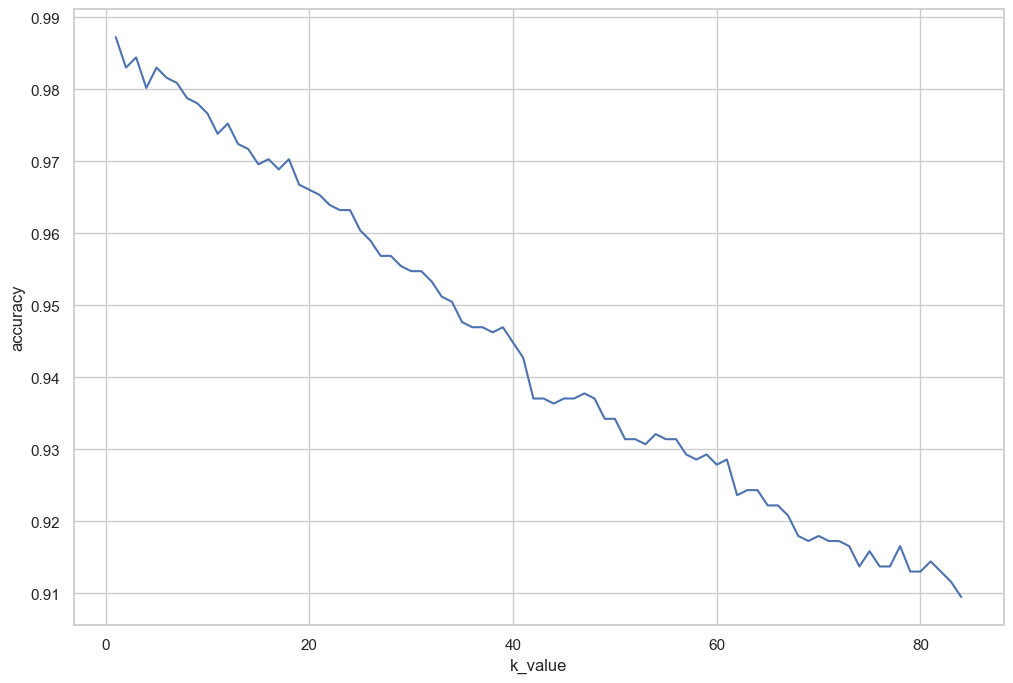

In [88]:
### Let's see all the accuracies!

import pandas as pd

# Let's create a new pandas dataframe using the data from the above cell
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(12,8)})  # other options: darkgrid, whitegrid, dark, white, ticks
sns.lineplot(x="k_value", y="accuracy", data=crossvalidation_df)

In [89]:
#
# With the best k, we build and train a new model:
#
# Now using best_k instead of the original, randomly-guessed value:   
#
best_k = best_k   # not needed, but nice to remind ourselves of the variable name
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

# How does it do?!  The next cell will show...

Created + trained a knn classifier, now tuned with a (best) k of 1


In [90]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

# Plus, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [4. 6. 8. 7. 8. 2. 1. 8. 1. 7. 7. 8. 4. 9. 2. 4. 1. 6. 5. 9. 3. 2. 7. 0.
 0. 1. 6. 5. 9. 5. 3. 3. 9. 7. 5. 4. 9. 6. 5. 5. 6. 1. 9. 6. 1. 0. 1. 9.
 4. 2. 0. 3. 5. 1. 4. 5. 8. 9. 3. 2. 1. 5. 0. 2. 2. 5. 8. 8. 5. 6. 9. 1.
 6. 5. 6. 7. 5. 2. 5. 5. 4. 5. 8. 9. 4. 2. 4. 3. 3. 9. 4. 7. 4. 3. 6. 6.
 6. 7. 4. 9. 2. 0. 0. 3. 1. 2. 6. 0. 8. 7. 6. 2. 8. 4. 5. 8. 9. 6. 1. 6.
 9. 2. 5. 9. 4. 7. 0. 2. 4. 8. 4. 2. 5. 6. 8. 1. 4. 1. 2. 7. 4. 7. 5. 8.
 5. 5. 9. 2. 9. 8. 7. 3. 9. 0. 1. 4. 1. 1. 3. 9. 9. 6. 9. 4. 7. 5. 4. 9.
 2. 2. 2. 6. 2. 2. 8. 6. 7. 9. 1. 4. 8. 4. 7. 2. 3. 1. 0. 6. 1. 3. 9. 1.
 7. 8. 7. 2. 7. 9. 3. 9. 3. 5. 7. 4. 3. 2. 3. 9. 3. 3. 2. 8. 4. 9. 3. 6.
 7. 8. 8. 7. 0. 6. 8. 3. 4. 3. 1. 1. 6. 2. 6. 9. 7. 2. 3. 6. 3. 4. 9. 6.
 5. 3. 6. 4. 6. 3. 0. 5. 7. 1. 3. 2. 6. 5. 4. 8. 5. 9. 1. 0. 9. 8. 4. 4.
 6. 6. 6. 2. 7. 4. 3. 3. 3. 8. 0. 0. 9. 5. 8. 9. 0. 7. 5. 2. 1. 4. 7. 2.
 5. 2. 0. 1. 6. 1. 0. 6. 7. 9. 1. 8. 4. 2. 1. 5. 1. 7. 3. 2. 9. 2. 2. 7.
 7. 6. 0. 7. 1. 9. 5. 4. 0. 1. 2.

352

In [92]:
#
# Ok!  We tuned our knn modeling to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)     # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # KEY DIFFERENCE:  we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 1


In [93]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):                 # to allow the input of any Model
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed for 2d
    predicted_digits = Model.predict(our_features)       # The model's prediction!
    predicted_digits = int(round(predicted_digits[0]))  # unpack the extra brackets
    return predicted_digits
   
#
# Try it!
# 

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


# run on each one:
for Features in LoD:
    predicted_digits = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = DIGITS[predicted_digits]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict 4 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 from the features [0, 0, 0, 3, 16,

In [86]:
#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the iris- or births modeling notebooks into here +++
#
# when the data is ready to view, you might want to grab
# the digits-visualization code
#

<br>

### <font color="DodgerBlue">Partial-digits finale</font>

This notebook's _final challenge_ is to run the whole learning-process from 1 pixel to 64 pixels:
  + it's best to create a **single cell** over which you can loop
  + no need to build the "final model" -- just use the cross-validation results for your measurement of prediction-accuracy
  + be sure to plot the prediction accuracy (on the y axis) against the number of pixels (on the x axis) 
  + extra karma - <font color="Goldenrod">not required</font> - for plotting the value of `k` (on the y axis) against the number of pixels (on the x axis)

+ In particular, this offers insight about the <u>redundancy</u> of the characters we use as digits...
  + Are you surprised by how redundant - or not - our digits are?
+ Some scripts/alphabets offer more redundancy than others 
  + Also, it depends on <i>how</i> information is added/removed.  
  + Here, we added pixels in "English reading order," top left to lower right across each row before moving to the next row. There are lots of other ways you could imagine adding one pixel at a time... (Not needed here!) 







In [106]:
target_column = 64
accuracy_results = []
best_k_results = []

for num_features in range(1, 65):

    X_all_part = A[:, 0:num_features]  
    y_all_part = A[:, target_column]

    # Cross-validation to find the best k
    best_k = -1
    best_accuracy = 0.0

    for k in range(1, 85):  # Loop over k values from 1 to 84
        knn_cv_model = KNeighborsClassifier(n_neighbors=k)  # Build a KNN model for each k
        cv_scores = cross_val_score(knn_cv_model, X_all_part, y_all_part, cv=5)  # Perform cross-validation
        this_cv_accuracy = cv_scores.mean()  # Compute the mean accuracy

        if this_cv_accuracy > best_accuracy:  # Update best accuracy and k
            best_accuracy = this_cv_accuracy
            best_k = k

    # Print the best k and corresponding accuracy for this num_features
    #print(f"For num_features = {num_features}, best_k = {best_k}, best CV accuracy: {best_accuracy:.4f}")
    print(f"n: {num_features:2d}  cv accuracy: {best_accuracy:7.4f}")

n:  1  cv accuracy:  0.1018
n:  2  cv accuracy:  0.1443
n:  3  cv accuracy:  0.2399
n:  4  cv accuracy:  0.2839
n:  5  cv accuracy:  0.3592
n:  6  cv accuracy:  0.4107
n:  7  cv accuracy:  0.4220
n:  8  cv accuracy:  0.4219
n:  9  cv accuracy:  0.4203
n: 10  cv accuracy:  0.4219
n: 11  cv accuracy:  0.4598
n: 12  cv accuracy:  0.4740
n: 13  cv accuracy:  0.5181
n: 14  cv accuracy:  0.5933
n: 15  cv accuracy:  0.6018
n: 16  cv accuracy:  0.6001
n: 17  cv accuracy:  0.5995
n: 18  cv accuracy:  0.6154
n: 19  cv accuracy:  0.6352
n: 20  cv accuracy:  0.6595
n: 21  cv accuracy:  0.6991
n: 22  cv accuracy:  0.7285
n: 23  cv accuracy:  0.7410
n: 24  cv accuracy:  0.7404
n: 25  cv accuracy:  0.7404
n: 26  cv accuracy:  0.7557
n: 27  cv accuracy:  0.7664
n: 28  cv accuracy:  0.7936
n: 29  cv accuracy:  0.7958
n: 30  cv accuracy:  0.8383
n: 31  cv accuracy:  0.8484
n: 32  cv accuracy:  0.8484
n: 33  cv accuracy:  0.8484
n: 34  cv accuracy:  0.8513
n: 35  cv accuracy:  0.8688
n: 36  cv accuracy: 

In [107]:
target_column = 64
accuracy_results = []
best_k_results = []
n_features = []

for num_features in range(1, 65):

    X_all_part = A[:, 0:num_features]  
    y_all_part = A[:, target_column]

    # Cross-validation to find the best k
    best_k = -1
    best_accuracy = 0.0

    for k in range(1, 85):  # Loop over k values from 1 to 84
        knn_cv_model = KNeighborsClassifier(n_neighbors=k)  # Build a KNN model for each k
        cv_scores = cross_val_score(knn_cv_model, X_all_part, y_all_part, cv=5)  # Perform cross-validation
        this_cv_accuracy = cv_scores.mean()  # Compute the mean accuracy

        if this_cv_accuracy > best_accuracy:  # Update best accuracy and k
            best_accuracy = this_cv_accuracy
            best_k = k

    accuracy_results.append(best_accuracy)
    best_k_results.append(best_k)
    n_features.append(num_features)

    # Print the best k and corresponding accuracy for this num_features
    #print(f"For num_features = {num_features}, best_k = {best_k}, best CV accuracy: {best_accuracy:.4f}")
    #print(f"n: {num_features:2d}  cv accuracy: {best_accuracy:7.4f}")

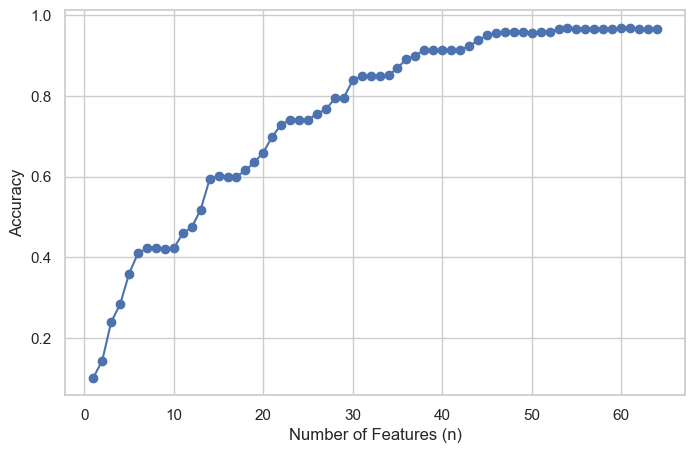

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(n_features, accuracy_results, marker='o', linestyle='-')
plt.xlabel("Number of Features (n)")
plt.ylabel("Accuracy")

plt.show()

### <font color="Coral">Overall reflection</font>
+ Do be sure to <font color="Coral">share your short reflection</font>, a few sentences on your ML/AI workflows overall, as well as the results of your digit-prediction across all those partial digits...

Reflection: It is interesting to see that using the maximum number of pixels (64) does not produce the greatest CV accuracy of the model - the maximum occurs at n = 60. I wonder if there was a way to expedite the code to loop through all num_features (range from 1 to 64) and the accuracies for each case as it took me 5+ minutes to run the code. 